In [ ]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Veo 3 Video Generation

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/veo3_video_generation.ipynb">
      <img src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fvision%2Fgetting-started%2Fveo3_video_generation.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/vision/getting-started/veo3_video_generation.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/veo3_video_generation.ipynb">
      <img width="32px" src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/veo3_video_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/veo3_video_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/veo3_video_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/veo3_video_generation.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/veo3_video_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>

| | |
|-|-|
|Author(s) | [Katie Nguyen](https://github.com/katiemn) |

## Overview

### Veo 3

Veo 3 on Vertex AI gives application developers access to Google's cutting-edge video generation. This model creates videos with stunning detail and realistic physics across a wide array of visual styles. Veo 3 enhances video quality from text and image prompts, and now includes dialogue and audio generation.

In this tutorial, you will learn how to use the Google Gen AI SDK for Python to interact with Veo 3 and generate new videos with audio from:
- Enhanced text prompts
- Starting input images

## Get started

### Install Google Gen AI SDK for Python

In [1]:
%pip install --upgrade --quiet google-genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.7/217.7 kB 16.0 MB/s eta 0:00:00


### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment.

In [2]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Import libraries

In [3]:
import time

from IPython.display import Markdown, Video, display
from google import genai
from google.genai import types
import matplotlib.image as img
import matplotlib.pyplot as plt

### Set Google Cloud project information and create client

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [4]:
import os

PROJECT_ID = "pcs-gcp-cr-10055-prj-infy-hck"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

### Define a helper function to display media

In [5]:
def show_video(video):
    if isinstance(video, str):
        file_name = video.split("/")[-1]
        !gsutil cp {video} {file_name}
        display(Video(file_name, embed=True, width=600))
    else:
        with open("sample.mp4", "wb") as out_file:
            out_file.write(video)
        display(Video("sample.mp4", embed=True, width=600))

### Load the video generation model

In [6]:
video_model = "veo-3.0-generate-preview"
video_model_fast = "veo-3.0-fast-generate-preview"
gemini_model = "gemini-2.5-flash"

## Generate videos
Now, you'll generate videos from text and/or image prompts. You can get started with your own prompts or complete the next section to optimize your prompts with some established best practices.


### [Optional] Optimize your prompt: Text-to-video

By considering the following options in your prompt, you can use Veo to create higher quality videos that more closely resemble your desired outcome. Learn more about advanced [prompting techniques for Veo 3](https://medium.com/google-cloud/veo-3-a-detailed-prompting-guide-867985b46018). To get started specify the following, or leave them as `None` if they don't align with your specific goals.
- **Subject:** The "who" or "what" of your video
- **Action:** Describe movements, interactions, etc.
- **Scene:** The "where" and "when" of your video
- **Camera angles:** The shot's viewpoint
- **Camera movements:** For a more cinematic/dynamic experience
- **Lens effects:** How the camera "sees" the world
- **Style:** The video's artistic filter
- **Temporal elements:** To imply changes in time
- **Audio:** Various sound effects or dialogue that guides the visuals through sound

In [7]:
subject = "a crocodile"  # @param {type: 'string'}
action = "interrogating a rubber duck"  # @param {type: 'string'}
scene = "in an interview room"  # @param {type: 'string'}

camera_angle = "Over-the-Shoulder Shot"  # @param ["None", "Eye-Level Shot", "Low-Angle Shot", "High-Angle Shot", "Bird's-Eye View", "Top-Down Shot", "Worm's-Eye View", "Dutch Angle", "Canted Angle", "Close-Up", "Extreme Close-Up", "Medium Shot", "Full Shot", "Long Shot", "Wide Shot", "Establishing Shot", "Over-the-Shoulder Shot", "Point-of-View (POV) Shot"]
camera_movement = "Zoom (In)"  # @param ["None", "Static Shot (or fixed)", "Pan (left)", "Pan (right)", "Tilt (up)", "Tilt (down)", "Dolly (In)", "Dolly (Out)", "Zoom (In)", "Zoom (Out)", "Truck (Left)", "Truck (Right)", "Pedestal (Up)", "Pedestal (Down)", "Crane Shot", "Aerial Shot", "Drone Shot", "Handheld", "Shaky Cam", "Whip Pan", "Arc Shot"]
lens_effects = "None"  # @param ["None", "Wide-Angle Lens (e.g., 24mm)", "Telephoto Lens (e.g., 85mm)", "Shallow Depth of Field", "Bokeh", "Deep Depth of Field", "Lens Flare", "Rack Focus", "Fisheye Lens Effect", "Vertigo Effect (Dolly Zoom)"]
style = "Cinematic"  # @param ["None", "Photorealistic", "Cinematic", "Vintage", "Japanese anime style", "Claymation style", "Stop-motion animation", "In the style of Van Gogh", "Surrealist painting", "Monochromatic black and white", "Vibrant and saturated", "Film noir style", "High-key lighting", "Low-key lighting", "Golden hour glow", "Volumetric lighting", "Backlighting to create a silhouette"]
temporal_elements = "None"  # @param ["None", "Slow-motion", "Fast-paced action", "Time-lapse", "Hyperlapse", "Pulsating light", "Rhythmic movement"]

sound_effects = "Ticking clock"  # @param ["None", "Sound of a phone ringing", "Water splashing", "Soft house sounds", "Ticking clock", "City traffic and sirens", "Waves crashing", "Quiet office hum"]
dialogue = "Where were you last night?"  # @param {type: 'string'}

Now, you'll use Gemini to take all of these keywords and combine them into a detailed Veo prompt.

In [8]:
prompt = ""

keywords = [subject, action, scene]
optional_keywords = [
    camera_angle,
    camera_movement,
    lens_effects,
    style,
    temporal_elements,
    sound_effects,
]
for keyword in optional_keywords:
    if keyword != "None":
        keywords.append(keyword)
if dialogue != "":
    keywords.append(dialogue)

gemini_prompt = f"""
You are an expert video prompt engineer for Google's Veo model. Your task is to construct the most effective and optimal prompt string using the following keywords. Every single keyword MUST be included. Synthesize them into a single, cohesive, and cinematic instruction. Do not add any new core concepts. Output ONLY the final prompt string, without any introduction or explanation. Mandatory Keywords: {",".join(keywords)}
"""
response = client.models.generate_content(
    model=gemini_model,
    contents=gemini_prompt,
)

# Set Gemini's response in a prompt variable
prompt = response.text
display(Markdown(response.text))

A cinematic Over-the-Shoulder Shot of a crocodile in an interview room, interrogating a rubber duck. A prominent ticking clock is visible. The camera slowly Zooms In as the crocodile intensely asks, "Where were you last night?"

### Generate videos from a text prompt

With Veo 3, you have the option to generate 8 second videos from a text prompt. In order to generate a video in the following sample, specify the following info:
- **Prompt:** A detailed description of the video you would like to see. Only edit the prompt if you didn't generate a detailed prompt with Gemini in the previous section.
- **Prompt enhancement:** The model offers the option to enhance your provided prompt.
- **Audio generation:** Set `generate_audio` to True if you'd like audio to be included in the output video.
- **Aspect ratio:** 16:9
- **Number of videos:** Set this value to 1 or 2.
- **Video duration:** 8 seconds

In [ ]:
if prompt == "":
    prompt = "a garden gnome singing a pop song in a whimsical outdoor garden"  # @param {type: 'string'}

In [9]:
print(prompt)
enhance_prompt = True  # @param {type: 'boolean'}
generate_audio = True  # @param {type: 'boolean'}

operation = client.models.generate_videos(
    model=video_model,
    prompt=prompt,
    config=types.GenerateVideosConfig(
        aspect_ratio="16:9",
        number_of_videos=1,
        duration_seconds=8,
        person_generation="allow_adult",
        enhance_prompt=enhance_prompt,
        generate_audio=generate_audio,
    ),
)

while not operation.done:
    time.sleep(15)
    operation = client.operations.get(operation)
    print(operation)

if operation.response:
    show_video(operation.result.generated_videos[0].video.video_bytes)

A cinematic Over-the-Shoulder Shot of a crocodile in an interview room, interrogating a rubber duck. A prominent ticking clock is visible. The camera slowly Zooms In as the crocodile intensely asks, "Where were you last night?"
name='projects/pcs-gcp-cr-10055-prj-infy-hck/locations/us-central1/publishers/google/models/veo-3.0-generate-preview/operations/5593dd6c-aa7c-4943-b3fb-5c4880527b47' metadata=None done=None error=None response=None result=None
name='projects/pcs-gcp-cr-10055-prj-infy-hck/locations/us-central1/publishers/google/models/veo-3.0-generate-preview/operations/5593dd6c-aa7c-4943-b3fb-5c4880527b47' metadata=None done=None error=None response=None result=None
name='projects/pcs-gcp-cr-10055-prj-infy-hck/locations/us-central1/publishers/google/models/veo-3.0-generate-preview/operations/5593dd6c-aa7c-4943-b3fb-5c4880527b47' metadata=None done=None error=None response=None result=None
name='projects/pcs-gcp-cr-10055-prj-infy-hck/locations/us-central1/publishers/google/models

- **Veo 3 Fast:** For this next example, you'll use Veo 3 Fast. This model is a great option for use cases where latency is a priority over maximum quality.
- **File location:** In this request, the video will be stored in Cloud Storage once video generation is complete. Specify the bucket path where you would like this video to be stored in the `output_gcs` field.
- **Person generation:** When generating videos of people you can also set the `person_generation` parameter accordingly: `allow_adult`, `dont_allow`

In [ ]:
prompt = "sculpting a bowl on a pottery wheel while the person sculpting remarks: wow, I love this one"  # @param {type: 'string'}
output_gcs = "gs://[your-bucket-path]"  # @param {type: 'string'}
enhance_prompt = True  # @param {type: 'boolean'}
generate_audio = True  # @param {type: 'boolean'}


operation = client.models.generate_videos(
    model=video_model_fast,
    prompt=prompt,
    config=types.GenerateVideosConfig(
        aspect_ratio="16:9",
        output_gcs_uri=output_gcs,
        number_of_videos=1,
        duration_seconds=8,
        person_generation="allow_adult",
        enhance_prompt=enhance_prompt,
        generate_audio=generate_audio,
    ),
)

while not operation.done:
    time.sleep(15)
    operation = client.operations.get(operation)
    print(operation)

if operation.response:
    show_video(operation.result.generated_videos[0].video.uri)

### Generate videos from an image


#### Download the starting image

You can also generate a video by starting with an input image. In this example, you'll locally download an image that's stored in Google Cloud Storage. If you'd like, you can add the URL of the image you'd like to use to display it below. If you have a local image you'd like to use, you can specify that in the following steps.

In [14]:
!wget https://api.slingacademy.com/public/sample-photos/1.jpeg

--2025-07-18 10:29:39--  https://api.slingacademy.com/public/sample-photos/1.jpeg
Resolving api.slingacademy.com (api.slingacademy.com)... 172.67.219.10, 104.21.86.119, 2606:4700:3035::ac43:db0a, ...
Connecting to api.slingacademy.com (api.slingacademy.com)|172.67.219.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62472 (61K) [image/jpeg]
Saving to: ‘1.jpeg’

1.jpeg              100%[===================>]  61.01K  --.-KB/s    in 0.004s  

2025-07-18 10:29:39 (16.1 MB/s) - ‘1.jpeg’ saved [62472/62472]



If you'd like to use a different local image, modify the file name in `starting_image`.

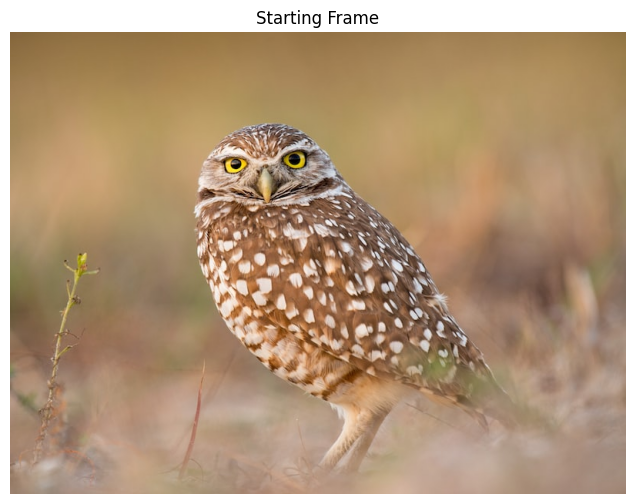

In [15]:
starting_image = "1.jpeg"  # @param {type: 'string'}

# Display the image
fig, axis = plt.subplots(1, 1, figsize=(12, 6))
axis.imshow(img.imread(starting_image))
axis.set_title("Starting Frame")
axis.axis("off")
plt.show()

#### [Optional] Optimize your prompt: Image-to-video

By considering the following options in your prompt, you can use Veo to create higher quality videos that more closely resemble your desired outcome. Learn more about advanced [prompting techniques for Veo 3](https://medium.com/google-cloud/veo-3-a-detailed-prompting-guide-867985b46018). To get started specify the following, or leave them as `None` if they don't align with your specific goals.
- **Camera motion:** The camera movement that occurs while the rest of the scene remains static
- **Subject animation:** Main character or object movement  
- **Environmental animation:** Background or atmosphere movement
- **Audio:** Various sound effects or dialogue that guides the visuals through sound

In [16]:
camera_motion = "Extreme Close-Up"  # @param ["None", "Eye-Level Shot", "Low-Angle Shot", "High-Angle Shot", "Bird's-Eye View", "Top-Down Shot", "Worm's-Eye View", "Dutch Angle", "Canted Angle", "Close-Up", "Extreme Close-Up", "Medium Shot", "Full Shot", "Long Shot", "Wide Shot", "Establishing Shot", "Over-the-Shoulder Shot", "Point-of-View (POV) Shot", "Static Shot (or fixed)", "Pan (left)", "Pan (right)", "Tilt (up)", "Tilt (down)", "Dolly (In)", "Dolly (Out)", "Zoom (In)", "Zoom (Out)", "Truck (Left)", "Truck (Right)", "Pedestal (Up)", "Pedestal (Down)", "Crane Shot", "Aerial Shot", "Drone Shot", "Handheld", "Shaky Cam", "Whip Pan", "Arc Shot", "Wide-Angle Lens (e.g., 24mm)", "Telephoto Lens (e.g., 85mm)", "Shallow Depth of Field", "Bokeh", "Deep Depth of Field", "Lens Flare", "Rack Focus", "Fisheye Lens Effect", "Vertigo Effect (Dolly Zoom)"]

subject_animation = "None"  # @param ["None", "The subject's head turns slowly", "The subject blinks slowly", "The subject's hair and clothes flutter gently in the wind", "A subtle smile appears on the subject's face"]
environmental_animation = "Light changes subtly"  # @param ["None", "Fog rolls in slowly", "Rain starts to fall gently", "Leaves rustle in the wind", "Light changes subtly", "Reflections move on water"]

sound_effects = "None"  # @param ["None", "Sound of a phone ringing", "Water splashing", "Soft house sounds", "Ticking clock", "City traffic and sirens", "Waves crashing", "Quiet office hum"]
dialogue = ""  # @param {type: 'string'}

Now, you'll use Gemini to take all of these keywords and combine them into a detailed Veo prompt.

In [17]:
prompt = ""

keywords = []
optional_keywords = [
    camera_motion,
    subject_animation,
    environmental_animation,
    sound_effects,
]
for keyword in optional_keywords:
    if keyword != "None":
        keywords.append(keyword)
if dialogue != "":
    keywords.append(dialogue)

gemini_prompt = f"""
You are an expert prompt engineer for Google's Veo model. Analyze the provided image and combine its content with the following motion and audio keywords to generate a single, cohesive, and cinematic prompt. Integrate the image's subject and scene with the requested motion and audio effects. The final output must be ONLY the prompt itself, with no preamble. Mandatory Keywords: {",".join(keywords)}
"""
with open(starting_image, "rb") as f:
    image = f.read()

response = client.models.generate_content(
    model=gemini_model,
    contents=[gemini_prompt, types.Part.from_bytes(data=image, mime_type="image/png")],
)

# Set Gemini's response in a prompt variable
prompt = response.text
display(Markdown(response.text))

Extreme Close-Up on a Burrowing Owl, its piercing yellow eyes fixed intently, with every speckled brown and white feather in sharp detail. The background is a soft, warm-toned blur of its natural grassland habitat. The light changes subtly, creating a nuanced play of highlights and shadows across its face and body, enhancing its watchful, cinematic presence.

#### Send the video request

If you're generating a video from an image you don't need to provide a prompt. The model will simply add motion to your image; however, a detailed prompt will help with video quality.


In [ ]:
if prompt == "":
    prompt = (
        "zoom out of the flower field, play whimsical music"  # @param {type: 'string'}
    )

In [18]:
print(prompt)
enhance_prompt = True  # @param {type: 'boolean'}
generate_audio = True  # @param {type: 'boolean'}

operation = client.models.generate_videos(
    model=video_model,
    prompt=prompt,
    image=types.Image.from_file(location=starting_image),
    config=types.GenerateVideosConfig(
        aspect_ratio="16:9",
        number_of_videos=1,
        duration_seconds=8,
        person_generation="allow_adult",
        enhance_prompt=enhance_prompt,
        generate_audio=generate_audio,
    ),
)

while not operation.done:
    time.sleep(15)
    operation = client.operations.get(operation)
    print(operation)

if operation.response:
    show_video(operation.result.generated_videos[0].video.video_bytes)

Extreme Close-Up on a Burrowing Owl, its piercing yellow eyes fixed intently, with every speckled brown and white feather in sharp detail. The background is a soft, warm-toned blur of its natural grassland habitat. The light changes subtly, creating a nuanced play of highlights and shadows across its face and body, enhancing its watchful, cinematic presence.
name='projects/pcs-gcp-cr-10055-prj-infy-hck/locations/us-central1/publishers/google/models/veo-3.0-generate-preview/operations/fd47ad5d-53cd-47a2-bc1d-bf187a6db2ea' metadata=None done=None error=None response=None result=None
name='projects/pcs-gcp-cr-10055-prj-infy-hck/locations/us-central1/publishers/google/models/veo-3.0-generate-preview/operations/fd47ad5d-53cd-47a2-bc1d-bf187a6db2ea' metadata=None done=None error=None response=None result=None
name='projects/pcs-gcp-cr-10055-prj-infy-hck/locations/us-central1/publishers/google/models/veo-3.0-generate-preview/operations/fd47ad5d-53cd-47a2-bc1d-bf187a6db2ea' metadata=None done=